In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# Part 1 ( Finding out the Anamoly and Threshold value)

In [2]:
import os

In [3]:
os.chdir('C:/Users/jarves/Desktop/Machine Learning/Andrew NG/ex8(Anamoly detection and recommender systems)')

In [5]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.cov(X.T)
    return mu, sigma

In [8]:
def multivariateGaussian(X,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(X)
## pdf Probability distribution function

In [10]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0

    stepsize = (np.max(pval) - np.min(pval)) / 1000
    evals = np.arange(np.min(pval), np.max(pval), stepsize)
    for epsilon in evals:
        predictions = (pval < epsilon).reshape((-1,1))
        X = np.hstack((predictions, yval))
        fp = np.sum((X[:,0] == 1) & (X[:,1] == 0))
        tp = np.sum((X[:,0] == 1) & (X[:,1] == 1))
        fn = np.sum((X[:,0] == 0) & (X[:,1] == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = (2 * prec * rec) / (prec + rec)

        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon

    return (bestEpsilon, bestF1)

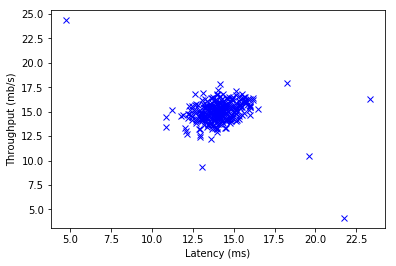

<class 'dict'>


In [11]:
raw_mat = scipy.io.loadmat("ex8data1.mat")
X = raw_mat.get("X")
Xval = raw_mat.get("Xval")
yval = raw_mat.get("yval")

plt.plot(X[:, 0], X[:, 1], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');
plt.show()
print(type(raw_mat))
mu, sigma2 = estimateGaussian(X) # returns flattened arrays

In [12]:
X.shape

(307, 2)

In [15]:
print(mu.shape)
print(mu)

(2,)
[14.11222578 14.99771051]


In [16]:
print(sigma2.shape)
print(sigma2)

(2, 2)
[[ 1.83862041 -0.22786456]
 [-0.22786456  1.71533273]]


In [17]:
pval = multivariateGaussian(X, mu, sigma2)
print(pval.shape)

(307,)


In [18]:
# Find Outliers
epsilon, F1 = selectThreshold(yval, pval)


C:\Users\jarves\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [19]:
outliers = np.where(pval < epsilon)


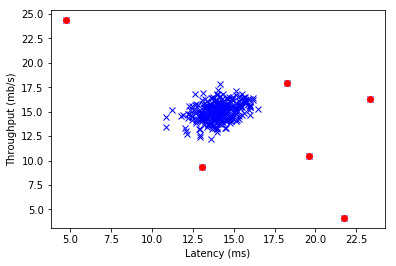

In [20]:
plt.figure()
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(X[:,0],X[:,1],'bx')
plt.plot(X[outliers,0],X[outliers,1],'ro')
plt.show()
